# MSA 2023 Phase 2 - Part 2


In [18]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report,roc_curve, auc
import pickle
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.linear_model import Lasso

RANDOM_STATE = 101
%matplotlib inline

# Data salaries


## 1. Load and split preprocessed data


In [2]:
df_salaries = pd.read_csv(
    '../0. Resources/datasets/data_salaries_preprocessed.csv')
print(df_salaries.shape)
df_salaries.head(10)

(2584, 6)


,work_year,experience_level,job_title,employee_residence,company_location,salary_in_usd
0,2023,3,84,26,25,85847
1,2023,2,66,75,70,30000
2,2023,2,66,75,70,25500
3,2023,3,47,11,12,175000
4,2023,3,47,11,12,120000
5,2023,3,8,75,70,222200
6,2023,3,8,75,70,136000
7,2023,3,47,11,12,219000
8,2023,3,47,11,12,141000
9,2023,3,47,75,70,147100


In [3]:
X = df_salaries.drop('salary_in_usd', axis=1)
y = df_salaries['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
print(f'Training data of X has shape: {X_train.shape}')
print(f'Training data of y has shape: {y_train.shape}')

Training data of X has shape: (1808, 5)
Training data of y has shape: (1808,)


## 2. Choose an algorithm


linear regression

- It focuses on the relationships between variables that are easy to implement. It is also less complex, and in some ways it can be used to avoid outliers.


lasso


In [4]:
lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

rmse_lasso = mean_squared_error(
    y_test, y_pred_lasso, squared=False)

rmse_lasso

54732.98057236904

random forest regression


In [5]:

rf = RandomForestRegressor(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mean_squared_error(y_test, y_pred_rf, squared=False)

53498.53385698836

## 3. Train and test a model


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4. Evaluate the model


In [7]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 54732.80897374218


# Credit Risk


## 1. Load and split preprocessed data


In [8]:
df_credit_risk = pd.read_csv(
    '../0. Resources/datasets/data_credit_risk_preprocessed.csv')
print(df_credit_risk.shape)
df_credit_risk.head(10)

(1268, 11)


,checking_status,duration,purpose,savings_status,personal_status,property_magnitude,age,other_payment_plans,existing_credits,own_telephone,class
0,1.0,6.0,6.0,4.0,3.0,3.0,67.0,1.0,1.0,1.0,1
1,0.0,48.0,6.0,2.0,0.0,3.0,22.0,1.0,0.0,0.0,0
2,3.0,12.0,2.0,2.0,3.0,3.0,49.0,1.0,0.0,0.0,1
3,1.0,42.0,3.0,2.0,3.0,1.0,45.0,1.0,0.0,0.0,1
4,1.0,24.0,4.0,2.0,3.0,2.0,53.0,1.0,1.0,0.0,0
5,3.0,24.0,3.0,1.0,3.0,1.0,53.0,1.0,0.0,0.0,1
6,0.0,36.0,9.0,2.0,3.0,0.0,35.0,1.0,0.0,1.0,1
7,3.0,12.0,6.0,3.0,1.0,3.0,61.0,1.0,0.0,0.0,1
8,0.0,30.0,4.0,2.0,2.0,0.0,28.0,1.0,1.0,0.0,0
9,0.0,12.0,4.0,2.0,0.0,0.0,25.0,1.0,0.0,0.0,0


In [9]:
X = df_credit_risk.drop('class', axis=1)
y = df_credit_risk['class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
print(f'Training data of X has shape: {X_train.shape}')
print(f'Training data of y has shape: {y_train.shape}')

Training data of X has shape: (887, 10)
Training data of y has shape: (887,)


## 2. Choose an algorithm


Random Forest

- There is an ensemble method called random forest. This method takes the average output of a number of deep decision trees and reduces the overfitting problem by using Bootstrap sampling in order to decrease the overfitting problem. The Bootstrap sampling process involves randomly sampling a dataset and then reshuffle the dataset. The dataset after bootstrapping sampling is still representative, but it is different from what it was before. We make multiple iterations of this process and bag the results.


In [10]:
rf = RandomForestClassifier(random_state=RANDOM_STATE)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [17]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 101,
 'verbose': 0,
 'warm_start': False}

## 3. Train and test a model


In [11]:
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.7637795275590551

In [12]:
rf = RandomForestClassifier(max_depth=15, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.7716535433070866

In [13]:
scores = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1)

print('Cross Validation accuracy scores: %s' % scores)
print('Cross Validation accuracy: %.3f +/- %.3f' %
      (np.mean(scores), np.std(scores)))

Cross Validation accuracy scores: [0.74157303 0.7752809  0.70786517 0.71910112 0.80898876 0.79775281
 0.84269663 0.84090909 0.75       0.80681818]
Cross Validation accuracy: 0.779 +/- 0.046


## 4. Evaluate the model


In [14]:
def evaluate_model(dt_classifier):

    print("Train Accuracy : {0:.3f}".format(
        accuracy_score(y_train, dt_classifier.predict(X_train))))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print(classification_report(y_train, dt_classifier.predict(X_train)))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(
        y_train, dt_classifier.predict(X_train))
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.2])
    plt.ylim([-0.1, 1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print("-"*50)
    print("Test Accuracy : {0:.3f}".format(
        accuracy_score(y_test, dt_classifier.predict(X_test))))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    print(classification_report(y_test, dt_classifier.predict(X_test)))

    false_positive_rate_test, true_positive_rate_test, thresholds_test = roc_curve(
        y_test, dt_classifier.predict(X_test))
    roc_auc_test = auc(false_positive_rate_test, true_positive_rate_test)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate_test, true_positive_rate_test, 'b',
             label='AUC = %0.2f' % roc_auc_test)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.2])
    plt.ylim([-0.1, 1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Train Accuracy : 0.999
Train Confusion Matrix:
[[454   0]
 [  1 432]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       454
           1       1.00      1.00      1.00       433

    accuracy                           1.00       887
   macro avg       1.00      1.00      1.00       887
weighted avg       1.00      1.00      1.00       887



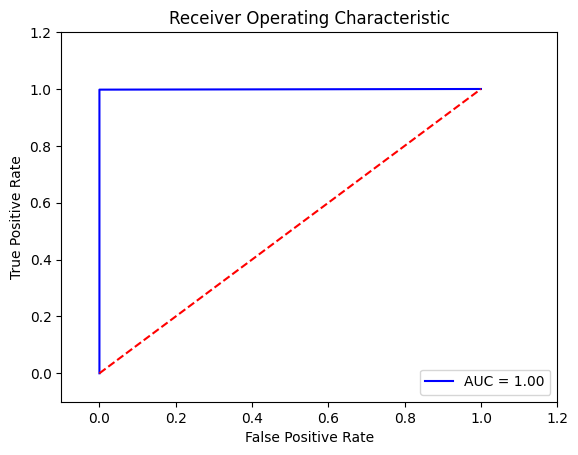

--------------------------------------------------
Test Accuracy : 0.772
Test Confusion Matrix:
[[151  29]
 [ 58 143]]
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       180
           1       0.83      0.71      0.77       201

    accuracy                           0.77       381
   macro avg       0.78      0.78      0.77       381
weighted avg       0.78      0.77      0.77       381



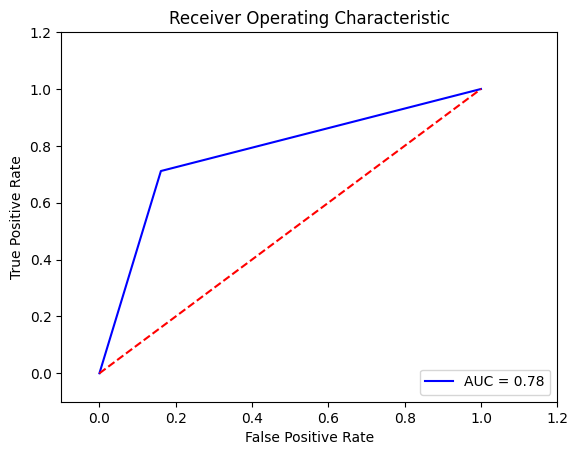

In [15]:
evaluate_model(rf)

In [16]:
pickle.dump(rf, open('../0. Resources/models/model.pkl', 'wb'))

### Hyperparameter Tuning


In [24]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'log2', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(
    rf, param_grid_rf, scoring='accuracy', cv=5, verbose=1, n_jobs=5)

rf_grid.fit(X_train, y_train)


best_params = rf_grid.best_params_
best_accuracy = rf_grid.best_score_

best_params, best_accuracy

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


({'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.796045197740113)